# Inteligentná analýza údajov
# Zadanie 3 - strojové učenie

### Michal Greguš, Samuel Kováč

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib as mat
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import RobustScaler
import math
from statsmodels.graphics.gofplots import qqplot
import copy
from scipy.stats import normaltest
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from numpy import exp
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

**Načítanie trénovacieho a testovacieho datasetu**

In [2]:
data_train = pd.read_csv("data/train.csv", sep = '\t')
data_test = pd.read_csv("data/test.csv", sep = '\t')
data_test.columns

Index(['hbver', 'er-cv', 'hematokrit', 'trombocyty', 'erytrocyty',
       'hemoglobin', 'age', 'leukocyty', 'weight', 'ast', 'alt', 'etytr',
       'alp', 'sex', 'blood_group', 'race', 'smoker', 'relationship',
       'indicator'],
      dtype='object')

Identifikované 4 atribúty v predchádzajúcej fáze, ktoré budú použité v rámci strojového učenia

In [3]:
used_atributes = ["trombocyty","hematokrit","etytr","leukocyty"]
dropped_atributes = ['hbver', 'er-cv', 'erytrocyty','hemoglobin', 'age', 'weight', 'ast', 'alt','alp', 'sex', 'blood_group', 'race', 'smoker', 'relationship',
       'indicator']

In [4]:
y_train = data_train['indicator']
x_train = data_train.drop(dropped_atributes,1)
x_train_all = data_train.drop('indicator',1)
y_test = data_test['indicator']
x_test = data_test.drop(dropped_atributes,1)
x_test_all = data_test.drop('indicator',1)

**použité hodnotiace metriky**

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$ 

TP = true positive

TN = true negative

FP = false positive

FN = false negative

## 1. Vytvorenie OneR rozhodovacieho stromu s využítím vybraných atribútov pre strojové učenie z predchádzajúceho zadania

V rozhodovacom strome typu OneR sme sa rozhodli zvážiť použiťie vybraných atribútov určených v predchádzajúcom zadaní a to trombocyty, hematorkrit a etytr v rovnakom poradí na určovanie hodnoty indikátoru. Premennú leukocyty sme sa rozhodli v tomto type klasifikátora vynechať, nakoľko sme v predošlom zadaní zistili, že jej hodnoty sú významné pri rozhodovaní klasifikátorov avšak tento atribút je len málo korelovaný z atribútom leukocyty a preto je ho takmer bezvýznamné použiť ako rozhodovacie pravidlo pri určovaní hodnoty indikatora čo možno vidieť aj na boxplote leukocytov a indicatoru. 

**atribut trombocyty**

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu trombocyty  vzhľadom na indikátor')

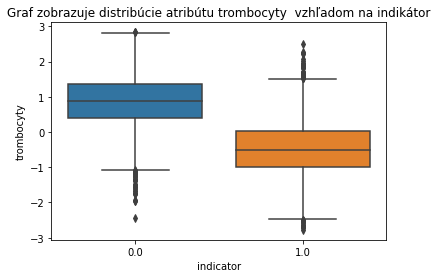

In [5]:
sns.boxplot(x='indicator', y=used_atributes[0], data=data_train).set_title('Graf zobrazuje distribúcie atribútu trombocyty  vzhľadom na indikátor')

In [6]:
data_train.loc[data_train['indicator'] == 1].trombocyty.describe()

count    4271.000000
mean       -0.476032
std         0.767753
min        -2.778650
25%        -0.980574
50%        -0.499928
75%         0.024308
max         2.493084
Name: trombocyty, dtype: float64

Ako vidíme existuje rozdiel v hodnotách indikátora pre rôzne hodnoty trombocytov. Ako prahovú hodnotu by sme si s grafu určili  hodnotu trombocytov 0,02. Pacienti s vyššou hodnotou budú mať indikátor predikovaný na 0 a pacienti s nižšou hodnotou na 1.

**atribut hematokrit**

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu hematokrit  vzhľadom na indikátor')

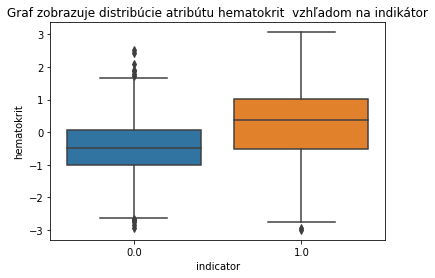

In [7]:
sns.boxplot(x='indicator', y=used_atributes[1], data=data_train).set_title('Graf zobrazuje distribúcie atribútu hematokrit  vzhľadom na indikátor')

In [8]:
data_train.loc[data_train['indicator'] == 0].hematokrit.describe()

count    2367.000000
mean       -0.465546
std         0.809413
min        -2.953739
25%        -1.010233
50%        -0.489317
75%         0.079804
max         2.518147
Name: hematokrit, dtype: float64

Ako vidíme existuje rozdiel v hodnotách indikátora pre rôzne hodnoty hematokritu. Ako prahovú hodnotu  by sme si s grafu určili  hodnotu hematokritu 0,07. Pacienti s vyššou hodnotou budú mať indikátor predikovaný na 1 a pacienti s nižšou hodnotou na 0.

**atribut etytr**

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu etytr  vzhľadom na indikátor')

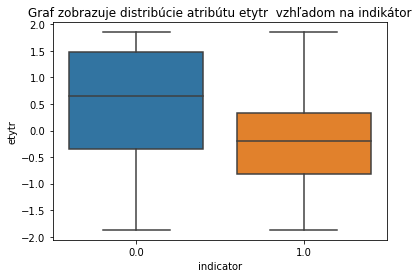

In [9]:
sns.boxplot(x='indicator', y=used_atributes[2], data=data_train).set_title('Graf zobrazuje distribúcie atribútu etytr  vzhľadom na indikátor')

In [10]:
data_train.loc[data_train['indicator'] == 1].etytr.describe()

count    4271.000000
mean       -0.262946
std         0.814036
min        -1.872139
25%        -0.810674
50%        -0.204874
75%         0.321855
max         1.851675
Name: etytr, dtype: float64

Ako vidíme existuje rozdiel v hodnotách indikátora pre rôzne hodnoty etytr. Ako prahovú hodnotu by sme si s grafu určili   hodnotu hematokritu 0,32. Pacienti s vyššou hodnotou budú mať indikátor predikovaný na 0 a pacienti s nižšou hodnotou na 1.

**atribut leukocyty**

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu etytr  vzhľadom na indikátor')

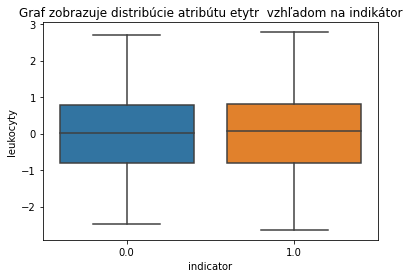

In [11]:
sns.boxplot(x='indicator', y=used_atributes[3], data=data_train).set_title('Graf zobrazuje distribúcie atribútu etytr  vzhľadom na indikátor')

Ako vidíme na základe distribúcie atribútu leukocyty nemožne predikovať hodnotu indikátora preto tento atribút v rozhodovacom strome OneR nebudeme uvažovať.

**Z grafov vidíme, že najjednoznačnejšie sa dá rozhodovať napríklad podľa atribútu trombocyty preto, predpokladáme, že strom ktorý bude dosahovať najlepšiu presnosť bude rozhodovať na základe tohto atribútu**

V prípade zmeny datasetu by však neboli prahové hodnoty, ktoré sme si identifikovali z grafov vhodné preto skúsime vytvoriť funkciu pre identifikovanie prahových hodnôt a následne navrhneme OneR stromový algoritmus v ktorom budú prahové hodnoty pre daný atribút počítané pomocou funkcie, avšak charakter vetiev stromu bude vždy rovnaký teda model bude predikovať len na základe jedného atribútu/pravidla. 

Taktiež navrhneme v strome funkciu na výber atribútu ktorá vyberie atribút pre ktorý strom dosahuje najvyššiu mieru úspešnosti s pomedzi daných 4 atribútov, aby bolo možné otestovať náš výber(atribútu trombocyty z grafov) resp. aj znovupoužiť daný strom pre iný dataset.

In [12]:
class OneR:
    def __init__(self):
        self.rules = []#prahove hodnoty pre rozhodovanie sa stromu pre jednotlive atributy
        self.atribute_best_accuracy = []#najlepsia dosiahnuta uspesnot pre rozne prahove hodnoty pre dany atribut
        self.atribute_name = []#nazov jednotlivych atributov
        self.predicted_ind_lt = []
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0
        self.precision = 0
        self.recall = 0
        self.best_atribute = ""
        self.border_atribute_value = 0
        self.best_acuracy = 0
        self.lt_predicted_ind = 0
        

    #natrenuje model
    def fit(self,x,y):
        for col in x.columns:
            self.get_border_value(x,y,col)
        self.best_acuracy = max(self.atribute_best_accuracy)
        best_acuracy_index = self.atribute_best_accuracy.index(self.best_acuracy)
        self.best_atribute = self.atribute_name[best_acuracy_index]
        self.border_atribute_value = self.rules[best_acuracy_index]
        self.lt_predicted_ind =  self.predicted_ind_lt[best_acuracy_index]
    
    #vrati pole y_predicted
    def predict(self,x):
        count = len(x)
        x = x[self.best_atribute]
        y_predicted = []
        indicator_lt = self.lt_predicted_ind
        if indicator_lt == 0:
            indicator_gt = 1
        else:
            indicator_gt = 0
            
        
        for i in range(0,count):
            if x[i] <= self.border_atribute_value:
                y_predicted.append(indicator_lt)
            else:
                y_predicted.append(indicator_gt)
        
        return y_predicted
    
    #vyberie prahovu hodnotu premmennej 
    def get_border_value(self,x,y,atribute):
        treshold_value = []
        succes_rate = []
        predicted_indicator_left = []
        i = 0
        minimum = x[atribute].min()
        maximum = x[atribute].max()
        
        for val in arange(minimum, maximum + 0.2, 0.2):
            if val >= minimum and val < maximum:
                left_predicted = self.get_majority(x[atribute], val, True, y, atribute)
                right_predicted = self.get_majority(x[atribute], val, False, y,atribute)
            else:
                break
            if left_predicted == right_predicted:
                treshold_value.append(val)
                succes_rate.append(0)
                predicted_indicator_left.append(-1)
            else:
                treshold_value.append(val)
                succes_rate.append(self.count_accuracy_test(x[atribute], val, y, left_predicted, right_predicted))
                predicted_indicator_left.append(left_predicted)
            i += 1
        best_rate = max(succes_rate)
        best_rate_index = succes_rate.index(best_rate)
        self.rules.append(treshold_value[best_rate_index])
        self.atribute_name.append(atribute)
        self.atribute_best_accuracy.append(best_rate)
        self.predicted_ind_lt.append(predicted_indicator_left[best_rate_index])
    
    
    def count_accuracy_test(self, x, treshold, y, left_predicted, right_predicted):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        count = len(x)
        for i in range(0, count):
            #predikovana je taka honodta ako left_predicted
            if x[i] <= treshold:
                if  y[i] == 1 and left_predicted == 1:
                    tp += 1
                elif y[i] == 0 and left_predicted == 0:
                    tn += 1
                elif y[i] == 1 and left_predicted == 0:
                    fp += 1
                elif y[i] == 0 and left_predicted == 1:
                    fn+= 1
            #predikovana je taka honodta ako right_predicted
            else:
                if  y[i] == 1 and right_predicted == 1:
                    tp += 1
                elif y[i] == 0 and right_predicted == 0:
                    tn += 1
                elif y[i] == 1 and right_predicted == 0:
                    fp += 1
                elif y[i] == 0 and right_predicted == 1:
                    fn+= 1
        return  ((tp + tn)/(tp + tn + fp + fn))
    
    #nastavy hodnotu indikatora danej vetvy podla majority
    def get_majority(self,x, treshold, smallerthen,y,atribute):
        indikator = []
        count = len(x)

        if smallerthen == True:
            for i in range(0, count):
                if x[i] <= treshold:
                    indikator.append(y[i])
        else:
            for i in range(0, count):
                if x[i] > treshold:
                    indikator.append(y[i])
        
        majorityelement = max(indikator, key = indikator.count)
        return majorityelement
        
    def count_metrics(self,real, predicted):
        count = len(real)
        for i in range(0, count):
            if  real[i] == 1 and predicted[i] == 1:
                self.tp += 1
            elif real[i] == 0 and predicted[i] == 0:
                self.tn += 1
            elif real[i] == 1 and predicted[i] == 0:
                self.fp += 1
            elif real[i] == 0 and predicted[i] == 1:
                self.fn+= 1
    
    def count_accuracy(self):
        return ((self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn))
        
    def count_precision(self):
        self.precision = ((self.tp)/(self.tp + self.fp))
        return self.precision
        
    def count_recall(self):
        self.recall = ((self.tp)/(self.tp + self.fn))
        return self.recall
        
    def count_fone_score(self):
        return 2*((self.precision * self.recall) / (self.precision + self.recall))
        
        

**natrénovanie stromového algoritmu OneR**

In [13]:
clf = OneR()
clf.fit(x_train,y_train)


**Atribút ktorý bol algoritmom vybraný na klasifikáciu, prahová hodnota tohto atribútu a predpokladaná accuracy modelu s danými parametrami**

(accuracy je predpokladaná podľa tej dosiahnutej na trénovacej sade)

In [14]:
print("vybraný atribút modelom s najvyššou úspešnosťou: {}".format(clf.best_atribute))
print("hraničná hodnota tohto atribútu použítá pri predikcii: {}".format(clf.border_atribute_value))
print("dosiahnutá úspešnosť tohto modelu na trénovacej sade podľa pri voľbe daného atribútu a danej prahovej hodnoty: {}".format(clf.best_acuracy))


vybraný atribút modelom s najvyššou úspešnosťou: trombocyty
hraničná hodnota tohto atribútu použítá pri predikcii: 0.4213497320908588
dosiahnutá úspešnosť tohto modelu na trénovacej sade podľa pri voľbe daného atribútu a danej prahovej hodnoty: 0.8333835492618259


Ako vidíme, skutočne bol atribút trombocyty vybraný ako najvýznamnejší pre daný strom.

**vizualizácia OneR stromu, ktorý sa rozhoduje podľa hodnoty trombocytov**

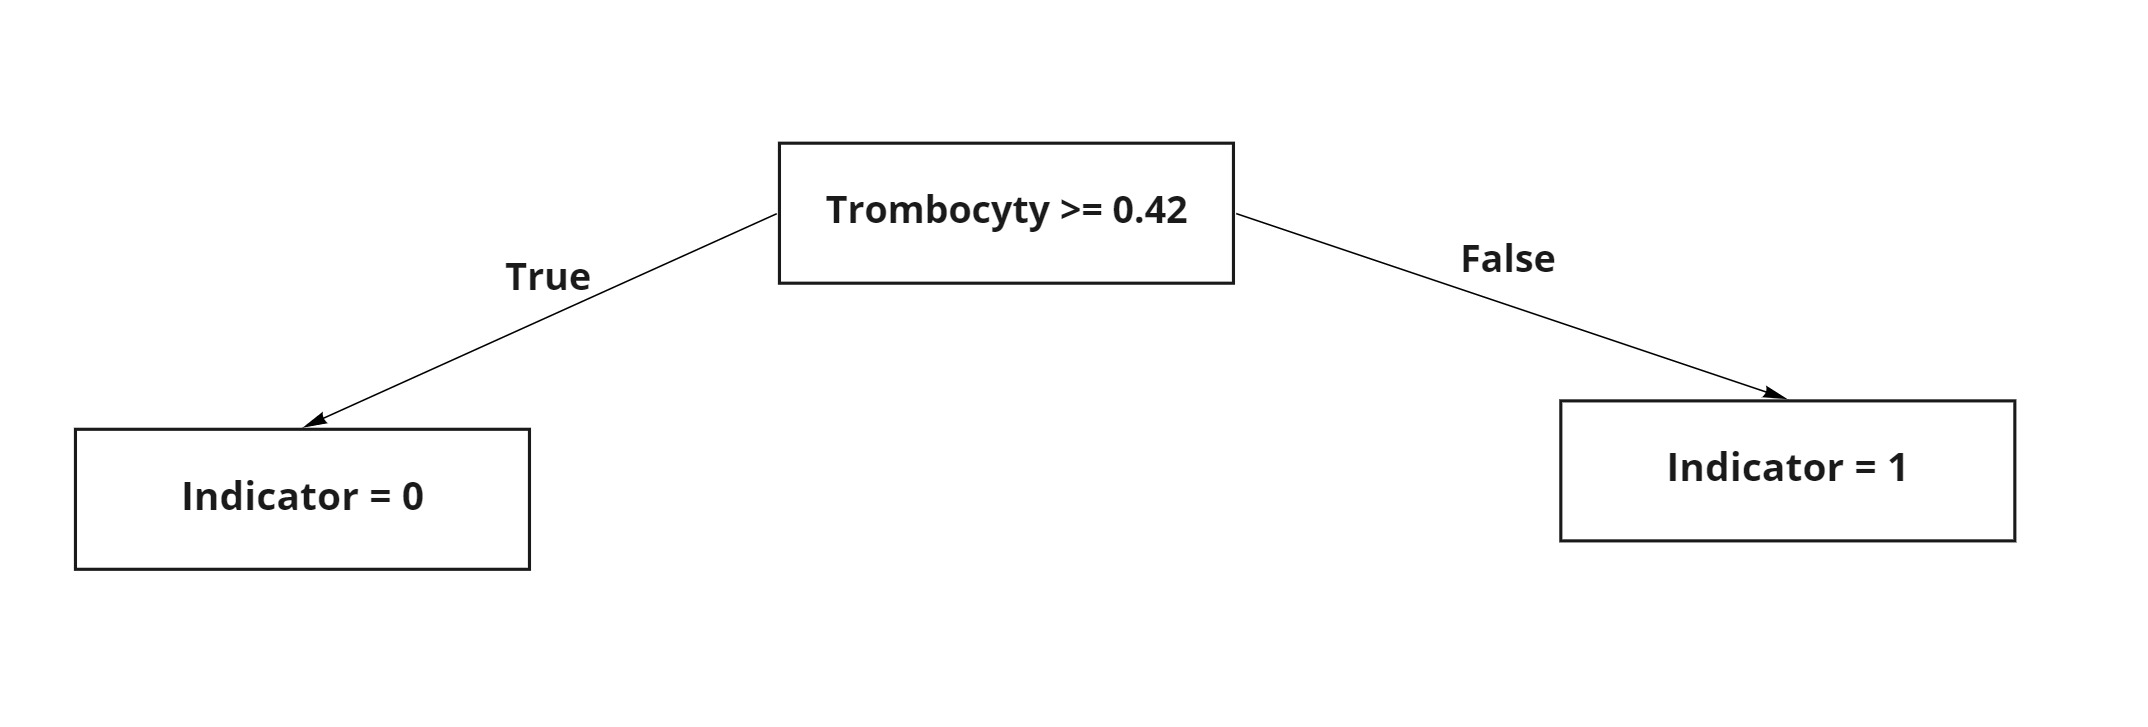

In [15]:
from IPython.display import Image
Image(filename='data/oneRvis.jpg') 

**Vyhodnotenie OneR stromového algoritmu**

Dosiahnutá úspešnosť modelu

In [16]:
y_predicted = clf.predict(x_test)
clf.count_metrics(y_test,y_predicted)
print("accuracy skóre modelu: {}".format(clf.count_accuracy()))
print("precision skóre modelu: {}".format(clf.count_precision()))
print("recall skóre modelu: {}".format(clf.count_recall()))

accuracy skóre modelu: 0.8223241590214068
precision skóre modelu: 0.8784738577484692
recall skóre modelu: 0.8523765996343693


In [17]:
print("f1 skóre modelu: {}".format(clf.count_fone_score()))

f1 skóre modelu: 0.865228485270239


Náš vytvorený model dosahuje relatívne dobré výsledky, je takmer rovnako dobrý ako klasifikátor Naive Bayess. Avšak zaostáva za klasifikátorom DecisionTree, ktorý dosiahol presnosť až 96%.

## 2. Natrénovanie a vyhodnotenie klasifikátora strojového učenia

### Decesion tree klasifikátor

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=7)
model = clf.fit(x_train, y_train)

vizualizácia rozhodovacieho stromu

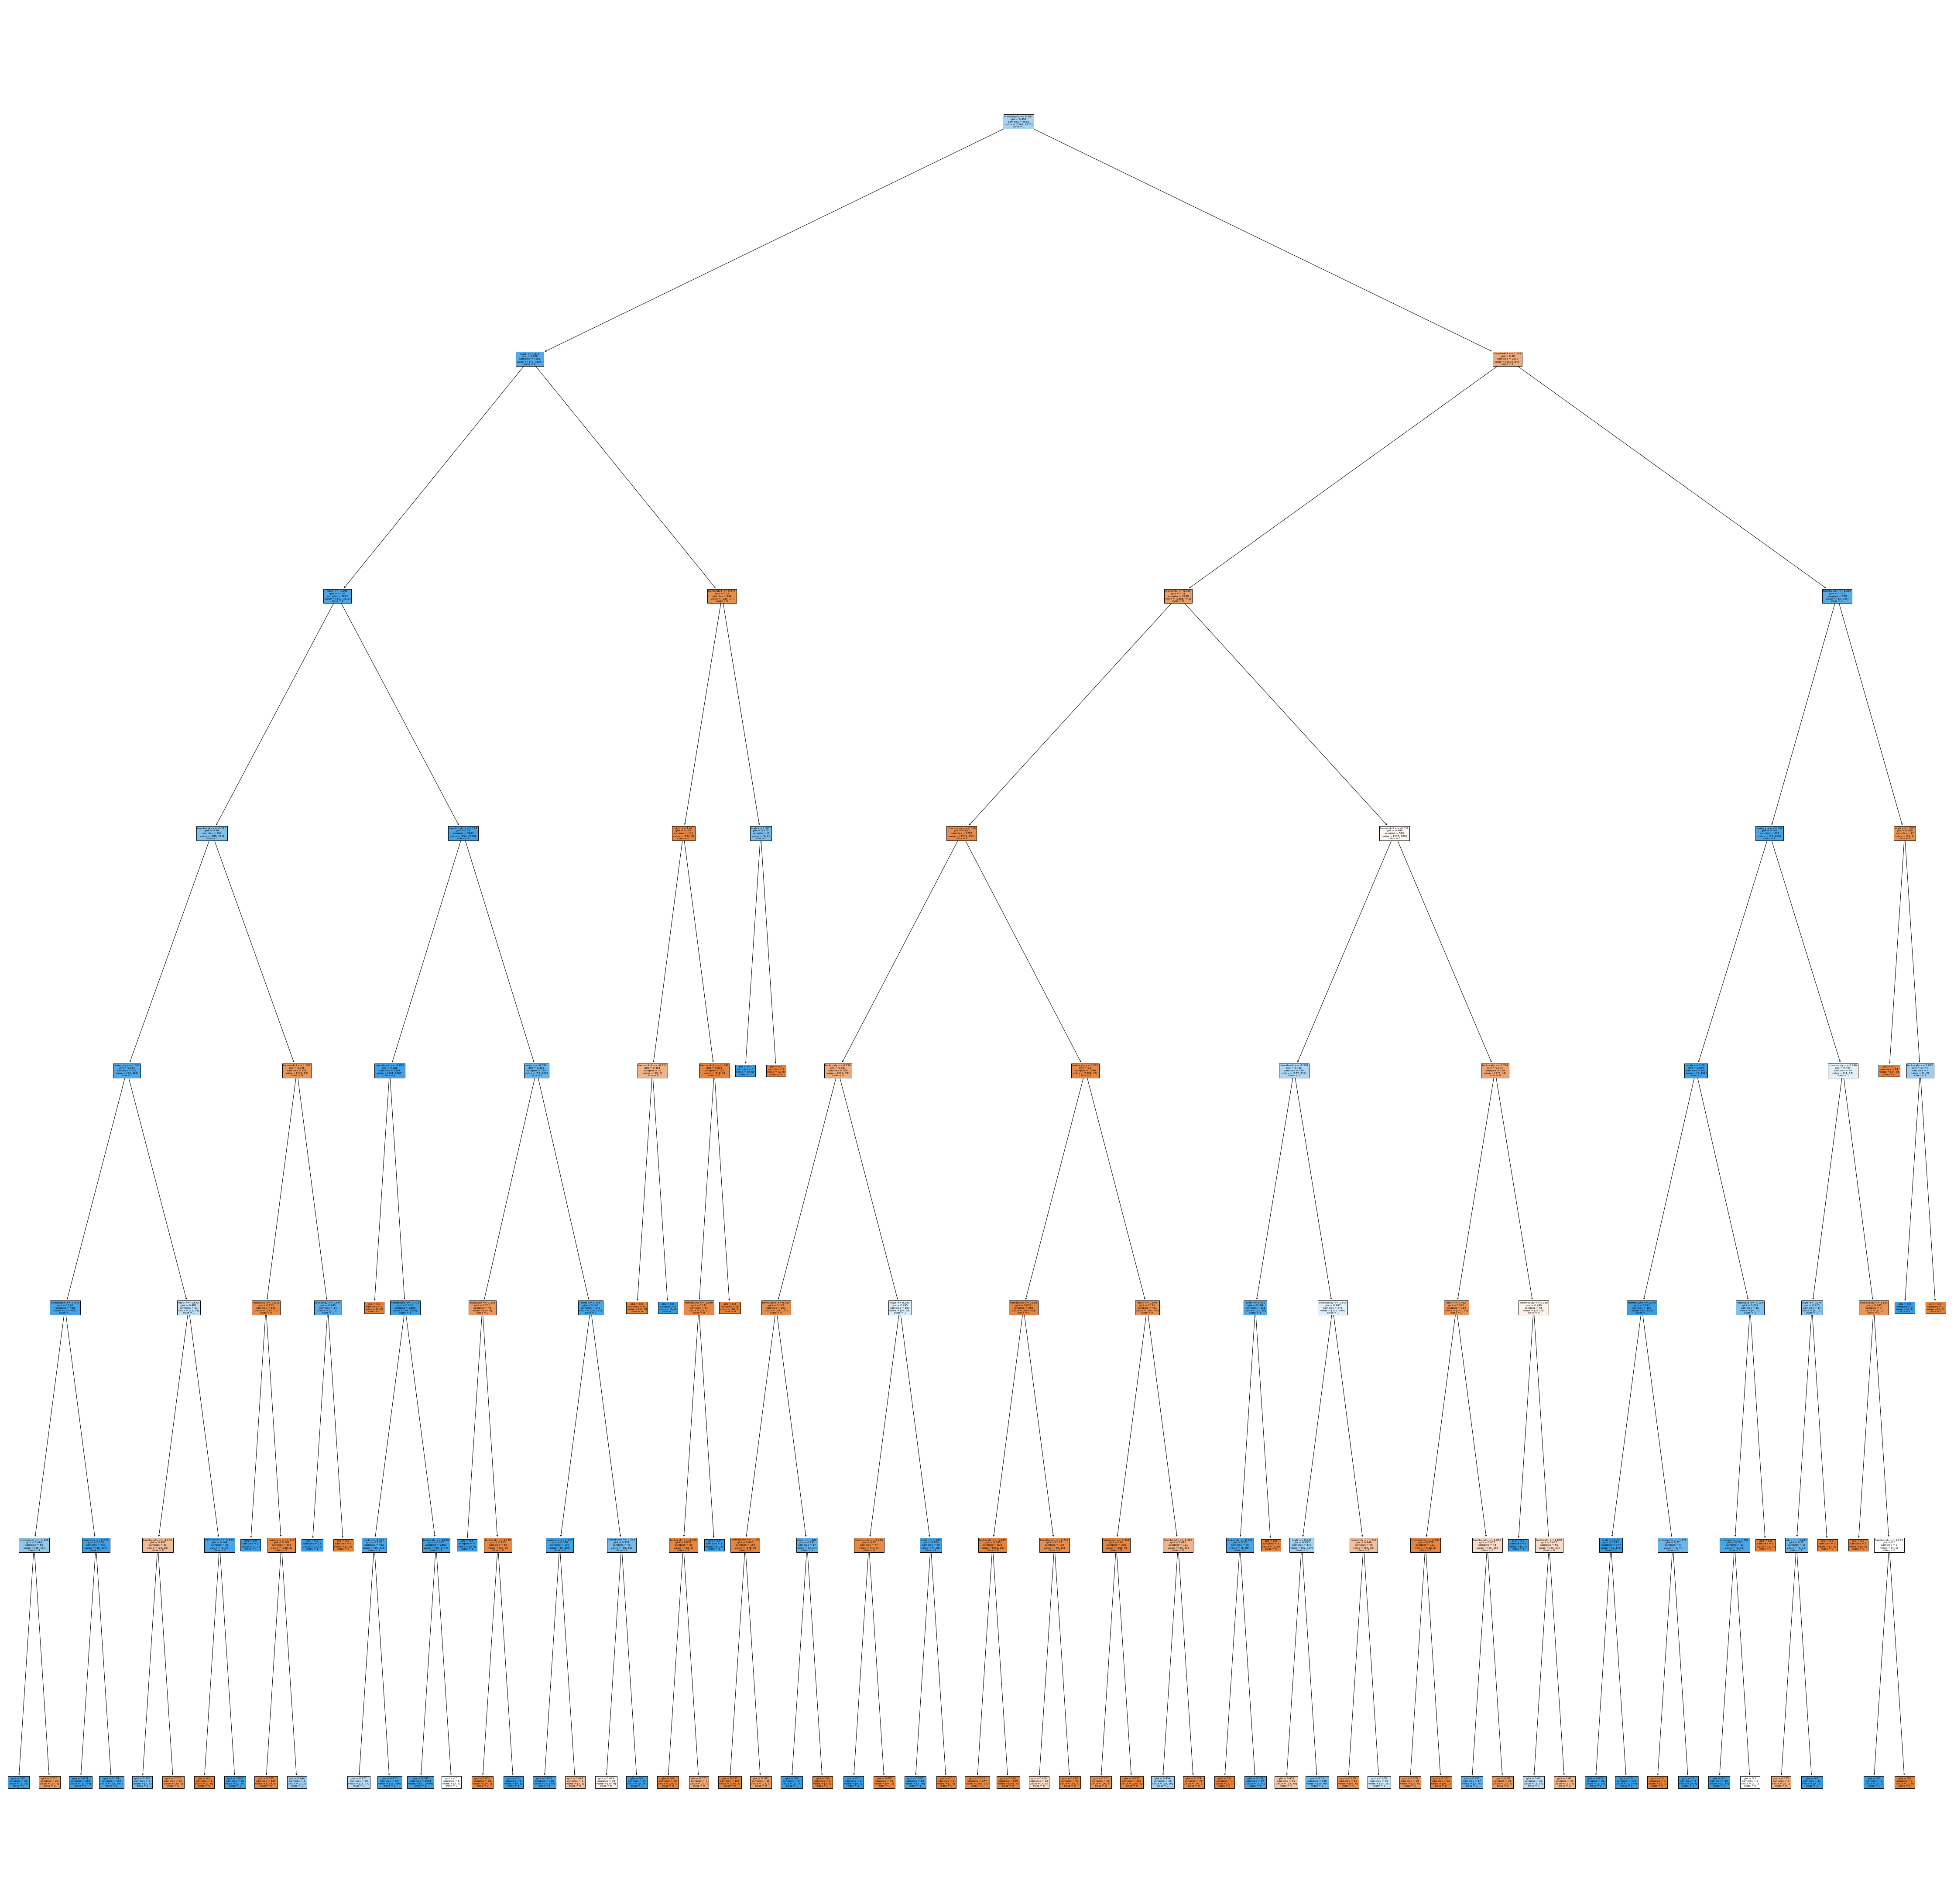

In [19]:
fig = plt.figure(figsize=(80,80))
_ = tree.plot_tree(clf, 
                   feature_names=x_train.columns,  
                   class_names=['0', '1'],
                   filled=True)
plt.savefig('data/vis.png')

In [20]:
y_predicted = model.predict(x_test)

Dosiahnutá úspešnosť modelu

In [21]:
DT_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9247706422018349
precision skóre modelu: 0.9246049335055698
recall skóre modelu: 0.9247706422018349


In [22]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9430555555555556


https://towardsdatascience.com/performance-metrics-in-machine-learning-part-1-classification-6c6b8d8a8c92

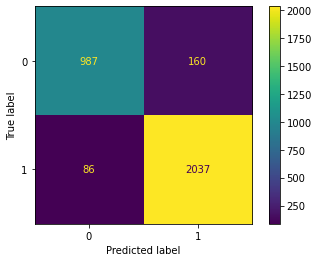

In [23]:
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

### Random forest klasifikátor

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(x_train, y_train)

In [25]:
y_predicted = model.predict(x_test)

Dosiahnutá úspešnosť modelu

In [26]:
skore = [accuracy_score(y_test, y_predicted)]
RF_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.954434250764526
precision skóre modelu: 0.9544006007356398
recall skóre modelu: 0.954434250764526


In [27]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9652761594034024


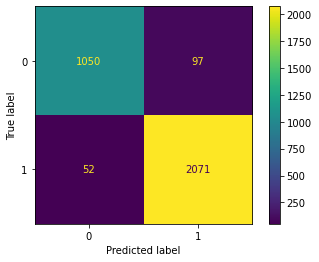

In [28]:
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

### Logistická regresia klasifikátor

In [29]:
clf = LogisticRegression()
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

Dosiahnutá úspešnosť modelu

In [30]:
print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8541284403669724
precision skóre modelu: 0.8527473047284978
recall skóre modelu: 0.8541284403669724


In [31]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8911207486875143


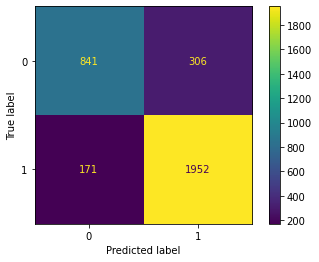

In [32]:
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

### Naive Bayes klasifikátor

In [33]:
clf = GaussianNB()
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

Dosiahnutá úspešnosť modelu

In [34]:
print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8376146788990826
precision skóre modelu: 0.8373319960953732
recall skóre modelu: 0.8376146788990826


In [35]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8752056404230317


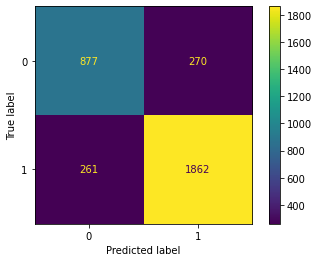

In [36]:
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

## 3. Optimalizácia - hyperparameter tuning

Najvyššiu úspešnosť spomedzi testovaných modelov dosiahli model **Random forest** a **Decision Tree**  a preto sme sa rozhodli ďalej vylepšovať tieto dva modely prostredníctvom hyperparameter tuning.

## Decision Tree - parametre

### criterion
Funkcia ktorou zmeriame (vyhodnotíme) kvalitu rozdelenia. Môže nadobúdať 2 hodnoty a to **gini** a **entropy**.

- **Gini impurity** je meranie pravdepodobnosti nesprávnej klasifikácie novej inštancie náhodnej premennej, pričom táto nová inštancia bola náhodne klasifikovaná podľa distribúcie údajov datasetu.

- **Entropy** môže byť opísaná množstvom nepredvídateľnosti v náhodnej premennej. Táto funkcia sa pri rozhodovacích stromoch využíva na určenie, koľko informácií je zakódovaných v konkrétnom rozhodnutí - inak povedané "váha" rozhodnutia

### splitter
Stratégia použitá na výber rozdelenia v každom uzle. Podporované stratégie sú **best** a **random**

- **best** vyhodnocuje všetky rozdelenia pomocou criterion funkcie ešte pred rozdelením

- **random** vyberá rozhodnutia náhodne pričom nemusí pri každom kroku prepočítavať optimálne rozdelenie. Túto stratégiu je vhodné zvoliť na zníženie *overfitting*-u

### max_depth
Označuje maximálnu hĺbku Decision Tree.

Určíme si dané parametre a vykonáme 10-násobnú cross-validation :

In [37]:
clf = tree.DecisionTreeClassifier()
parametre = {'criterion': ('gini','entropy'), 
             'splitter': ('best','random'),
             'max_depth': range(2,20)}

cross_validation = GridSearchCV(clf, parametre,cv=10)

model = cross_validation.fit(x_train, y_train)
model

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(2, 20),
                         'splitter': ('best', 'random')})

Vypísaním najlepších parametrov vidíme kombináciu parametrov zvolenú cross-validáciou :

In [38]:
best_params = cross_validation.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [39]:
clf = tree.DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    splitter=best_params['splitter'])

model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [40]:
DT_skore.append(accuracy_score(y_test, y_predicted))

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

accuracy skóre modelu: 0.9253822629969419
precision skóre modelu: 0.9250611932724266
recall skóre modelu: 0.9253822629969419
f1 skóre modelu: 0.9430438842203548


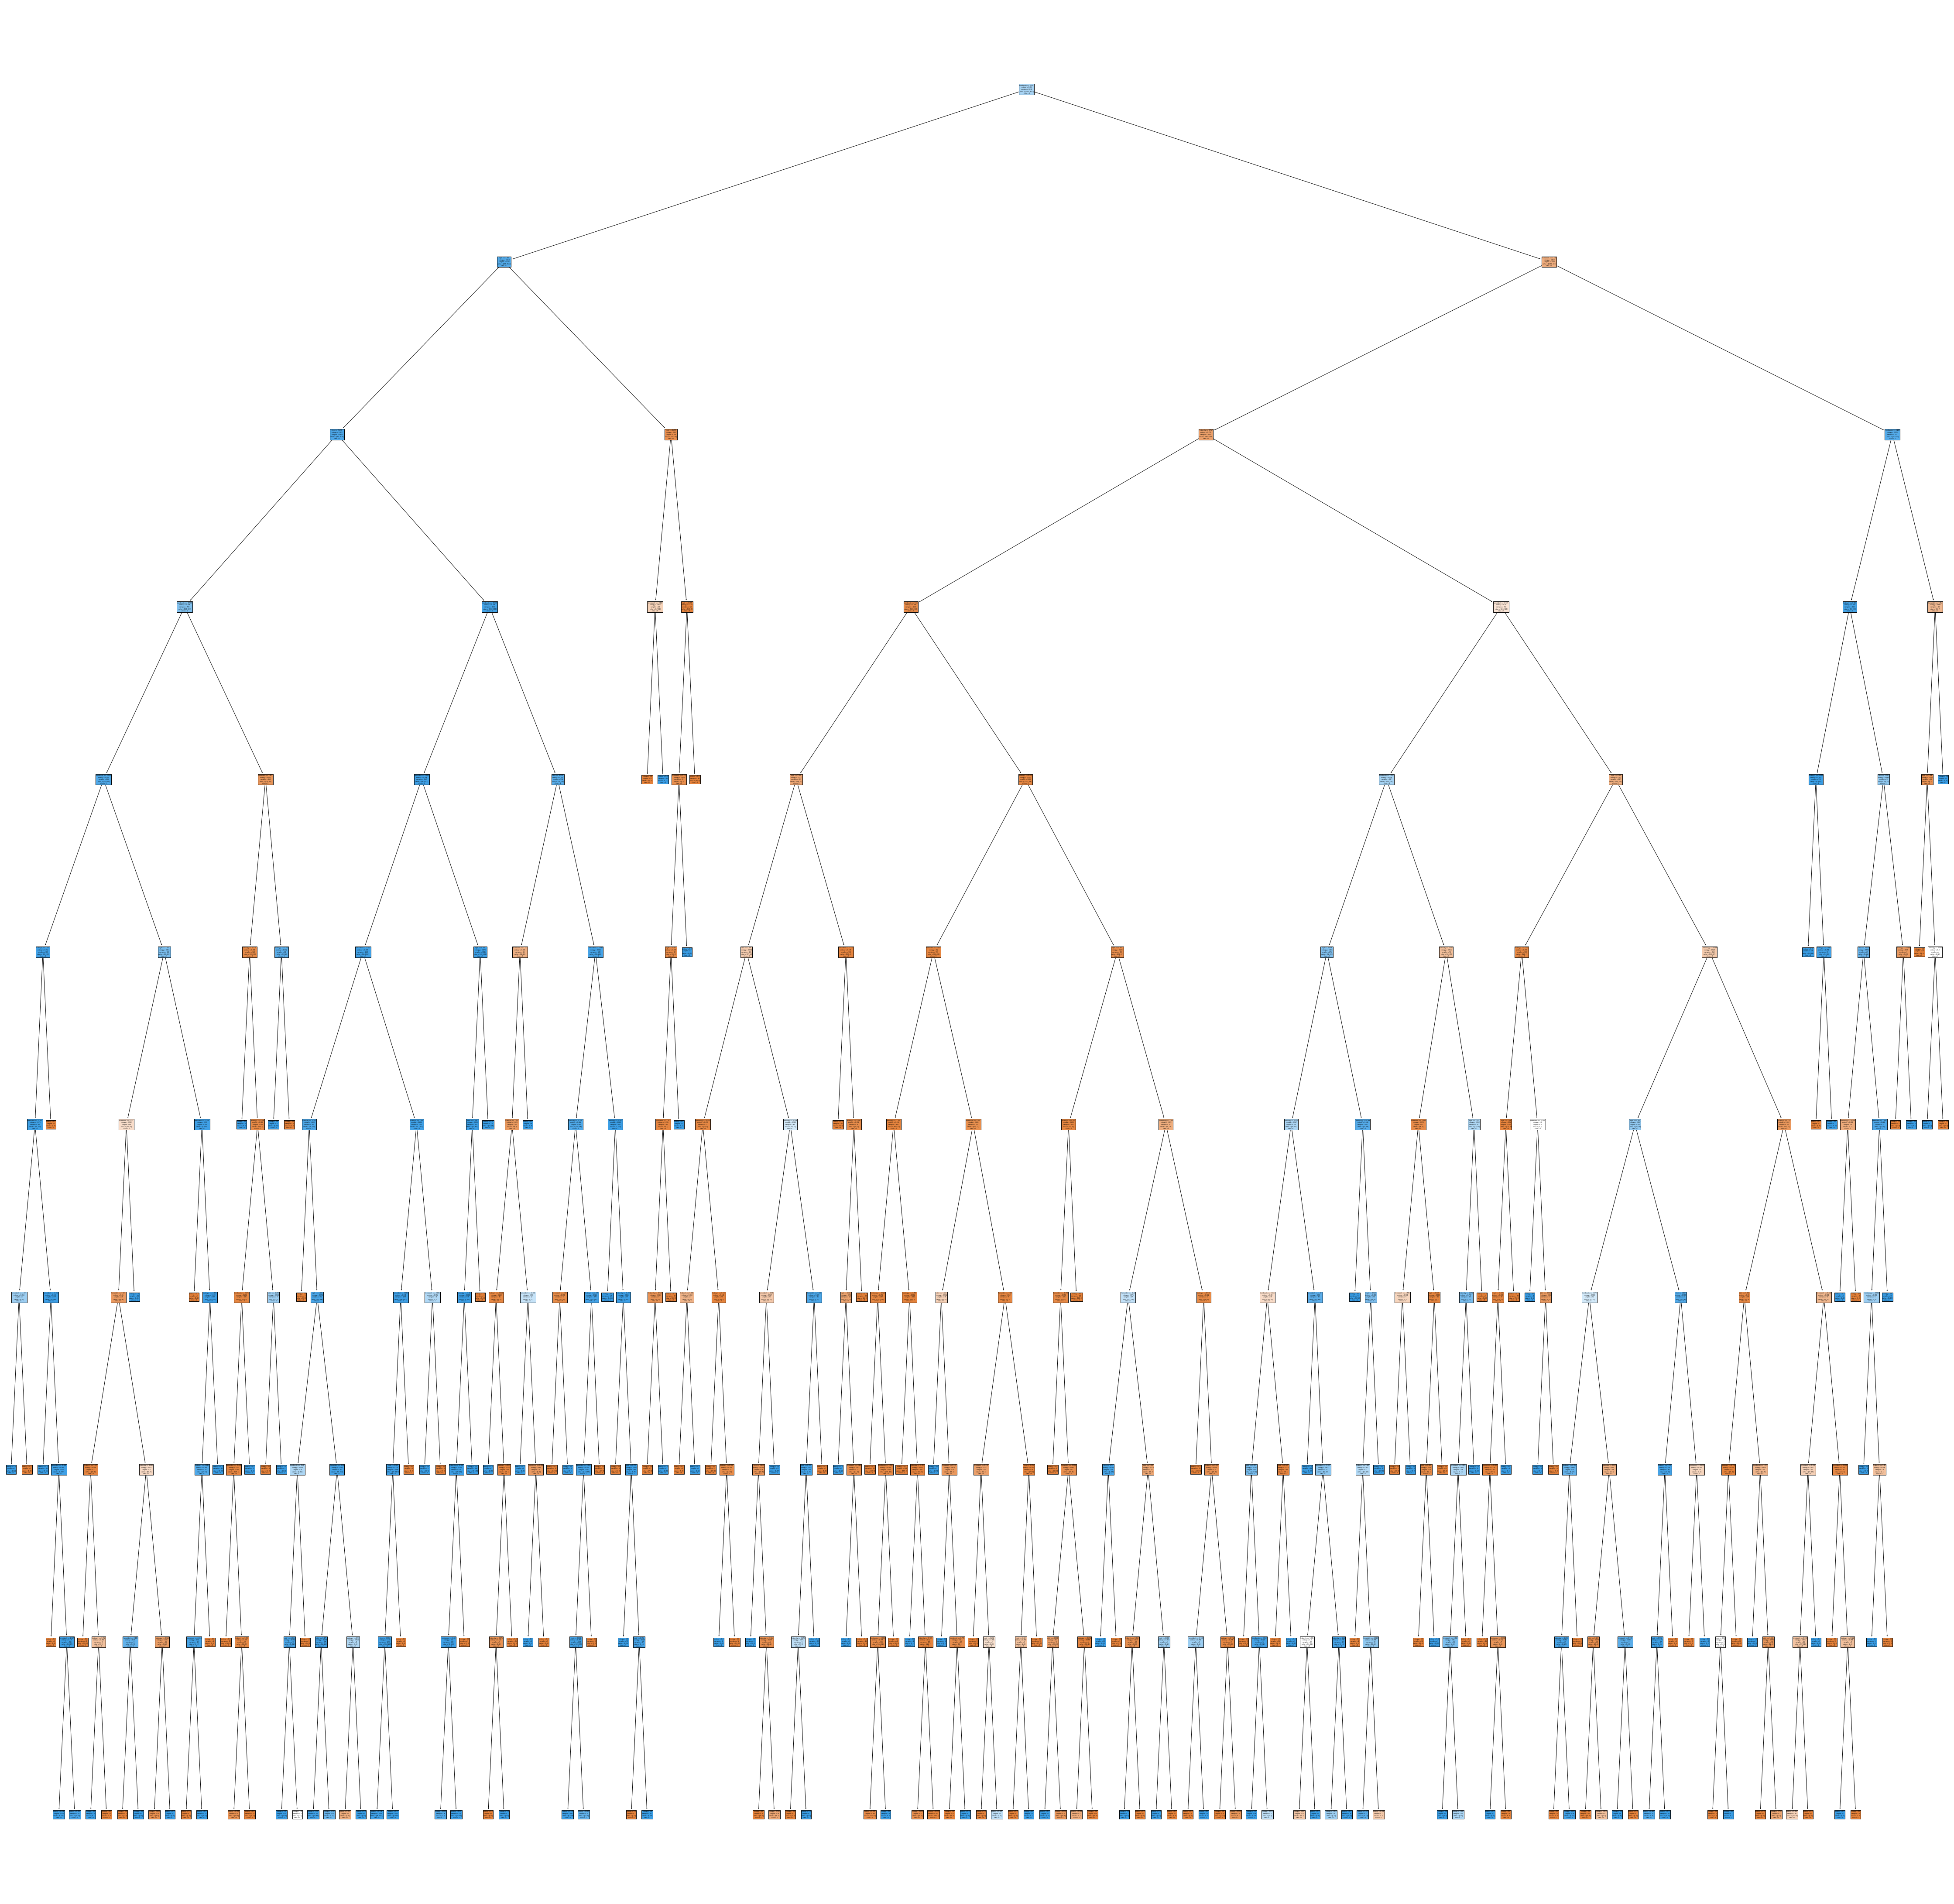

In [41]:
fig = plt.figure(figsize=(80,80))
_ = tree.plot_tree(clf, 
                   feature_names=x_train.columns,  
                   class_names=['0', '1'],
                   filled=True)

## Random Forest - parametre

### criterion
Funkcia ktorou zmeriame (vyhodnotíme) kvalitu rozdelenia. Môže nadobúdať 2 hodnoty a to **gini** a **entropy**.

- **Gini impurity** je meranie pravdepodobnosti nesprávnej klasifikácie novej inštancie náhodnej premennej, pričom táto nová inštancia bola náhodne klasifikovaná podľa distribúcie údajov datasetu.

- **Entropy** môže byť opísaná množstvom nepredvídateľnosti v náhodnej premennej. Táto funkcia sa pri rozhodovacích stromoch využíva na určenie, koľko informácií je zakódovaných v konkrétnom rozhodnutí - inak povedané "váha" rozhodnutia

### max_features
Maximálny počet funkcií zvažovaných pri rozdelení uzla.

### max_depth
Označuje maximálnu hĺbku každého Decision Tree v lese.

### min_samples_split
Minimálny počet vzoriek požadovaných na rozdelenie uzla.

### min_samples_leaf
Minimálny počet vzoriek požadovaný v liste stromu. Rozdelenie uzla v akejkoľvek hĺbke sa bude brať do úvahy iba vtedy, ak v ľavej aj pravej vetve ponechá aspoň *min_samples_leaf* vzoriek.

### n_estimators
Počet stromov v lese - vyššia hodnota znamená vyššiu presnosť ale spomaluje výpočet.

In [42]:
clf = RandomForestClassifier()
parametre = {'criterion': ('gini','entropy'),
             'n_estimators': range(100,300),
             'max_depth': range(2,20)}

cross_validation = GridSearchCV(clf, parametre,cv=5)

model = cross_validation.fit(x_train, y_train)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(2, 20),
                         'n_estimators': range(100, 300)})

In [43]:
best_params = cross_validation.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 189}


In [44]:
clf = RandomForestClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'])

model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [45]:
RF_skore.append(accuracy_score(y_test, y_predicted))
print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

accuracy skóre modelu: 0.954434250764526
precision skóre modelu: 0.954498024910869
recall skóre modelu: 0.954434250764526
f1 skóre modelu: 0.9653568937456406


## 4. Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu

Nevykonaním vybraných častí predspracovania zo zadania 2 sme si vytvorili nasledovné datasety, pre porovnanie akým spôsobom naše predspracovanie ovplyvnilo úspešnosť klasifikácie pre klasifikovanie rovnakým klasifikátorom.

**Pôvodné hodnoty dosiahnuté vybraným modelom na upravenom datasete**

accuracy skóre modelu: 0.9522935779816514

precision skóre modelu: 0.9522796074229911

recall skóre modelu: 0.9522935779816514

f1 skóre modelu: 0.9636871508379888

**Načítanie trénovacieho a testovacieho datasetu bez upravených vychýlených hodnôt alebo hýbajúcich hodnôt a bez vykonania transformácie alebo škálovania**

V tomto prípade by sa daný dataset ani nedal spracovať nakoľko by obsahoval riadky v ktorých bola hodnota nastavená na NaN a táto nemôže byť vstupom algoritmov pre strojové učenie.

**Načítanie trénovacieho a testovacieho datasetu bez vykonania škálovania alebo power transformer**

In [46]:
data_train_noscaling_nopowertransformer = pd.read_csv("data/train_bez_skalovania_aj_PT.csv", sep = '\t')
data_test_noscaling_nopowertransformer = pd.read_csv("data/test_bez_skalovania_aj_PT.csv", sep = '\t')
y_data_train_noscaling_nopowertransformer = data_train_noscaling_nopowertransformer['indicator']
x_data_train_noscaling_nopowertransformer = data_train_noscaling_nopowertransformer.drop(dropped_atributes,1)
y_data_test_noscaling_nopowertransformer = data_test_noscaling_nopowertransformer['indicator']
x_data_test_noscaling_nopowertransformer = data_test_noscaling_nopowertransformer.drop(dropped_atributes,1)

In [47]:
model = clf.fit(x_data_train_noscaling_nopowertransformer, y_data_train_noscaling_nopowertransformer)
y_predicted = model.predict(x_data_test_noscaling_nopowertransformer)

Dosiahnutá úspešnosť modelu

In [48]:
skore.append(accuracy_score(y_data_test_noscaling_nopowertransformer, y_predicted))
print("accuracy skóre modelu: {}".format(accuracy_score(y_data_test_noscaling_nopowertransformer, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_data_test_noscaling_nopowertransformer, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_data_test_noscaling_nopowertransformer, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8131498470948012
precision skóre modelu: 0.8120991503373758
recall skóre modelu: 0.8131498470948012


**Načítanie trénovacieho a testovacieho datasetu bez vykonania škálovania**

In [49]:
data_train_noscaling = pd.read_csv("data/train_bez_skalovania.csv", sep = '\t')
data_test_noscaling = pd.read_csv("data/test_bez_skalovania.csv", sep = '\t')
y_data_train_noscaling = data_train_noscaling['indicator']
x_data_train_noscaling = data_train_noscaling.drop(dropped_atributes,1)
y_data_test_noscaling = data_test_noscaling['indicator']
x_data_test_noscaling = data_test_noscaling.drop(dropped_atributes,1)

In [50]:
model = clf.fit(x_data_train_noscaling, y_data_train_noscaling)
y_predicted = model.predict(x_data_test_noscaling)

Dosiahnutá úspešnosť modelu

In [51]:
skore.append(accuracy_score(y_data_test_noscaling, y_predicted))
print("accuracy skóre modelu: {}".format(accuracy_score(y_data_test_noscaling, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_data_test_noscaling, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_data_test_noscaling, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9529051987767584
precision skóre modelu: 0.9530385197137239
recall skóre modelu: 0.9529051987767584


In [52]:
print("f1 skóre modelu: {}".format(f1_score(y_data_test_noscaling, y_predicted)))

f1 skóre modelu: 0.9642525533890436


**Načítanie trénovacieho a testovacieho datasetu bez vykonania power transformer**

In [53]:
data_train_nopowertransformer = pd.read_csv("data/train_bez_PT.csv", sep = '\t')
data_test_nopowertransformer = pd.read_csv("data/test_bez_PT.csv", sep = '\t')
y_data_train_nopowertransformer = data_train_nopowertransformer['indicator']
x_data_train_nopowertransformer = data_train_nopowertransformer.drop(dropped_atributes,1)
y_data_test_nopowertransformer = data_test_nopowertransformer['indicator']
x_data_test_nopowertransformer = data_test_nopowertransformer.drop(dropped_atributes,1)

In [54]:
model = clf.fit(x_data_train_nopowertransformer, y_data_train_nopowertransformer)
y_predicted = model.predict(x_data_test_nopowertransformer)

Dosiahnutá úspešnosť modelu

In [55]:
skore.append(accuracy_score(y_data_test_nopowertransformer, y_predicted))
print("accuracy skóre modelu: {}".format(accuracy_score(y_data_test_nopowertransformer, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_data_test_nopowertransformer, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_data_test_nopowertransformer, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9547400611620795
precision skóre modelu: 0.9547018030204762
recall skóre modelu: 0.9547400611620795


In [56]:
print("f1 skóre modelu: {}".format(f1_score(y_data_test_nopowertransformer, y_predicted)))

f1 skóre modelu: 0.9655011655011655


### Porovnanie dosiahnutých výsledkov pre jednotlivé dátové sady s využitím Random forest klasifikátora

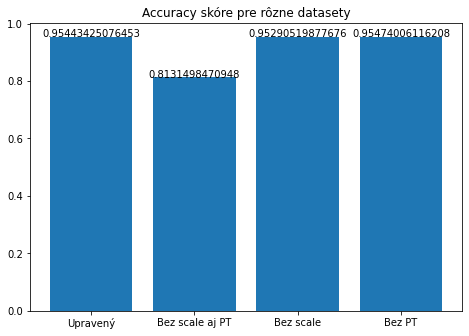

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre rôzne datasety")
datasety = ['Upravený', 'Bez scale aj PT', 'Bez scale', 'Bez PT']
ax.bar(datasety,skore)

for i in range(len(datasety)):
        plt.text(i, skore[i], round(skore[i],14), ha = 'center')
        
plt.show()

### Porovnanie dosiahnutých výsledkov pre zmeny jednotlivých parametrov v rámci hyperparameter tuning

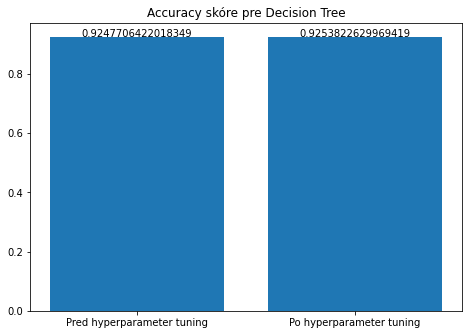

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Decision Tree")
datasety = ['Pred hyperparameter tuning', 'Po hyperparameter tuning']
ax.bar(datasety,DT_skore)
plt.text(0, DT_skore[0], DT_skore[0], ha = 'center')
plt.text(1, DT_skore[1], DT_skore[1], ha = 'center')
plt.show()

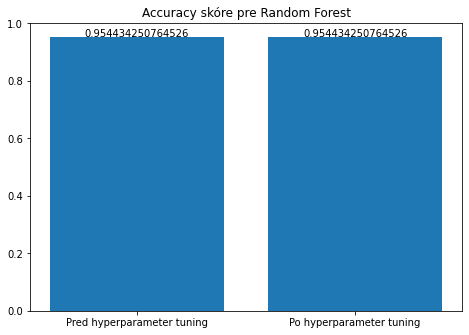

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Random Forest")
datasety = ['Pred hyperparameter tuning', 'Po hyperparameter tuning']
plt.text(0, RF_skore[0], RF_skore[0], ha = 'center')
plt.text(1, RF_skore[1], RF_skore[1], ha = 'center')
ax.bar(datasety,RF_skore)
plt.show()

### Porovnanie dosiahnutých výsledkov pre použité algoritmi, a atribúty

#### 1. Naive bayes

In [60]:
clf = GaussianNB()

dosiahnutá úspešnosť pri použití len vybraných atribútov(trombocyty, etytr, hematokrit a leukocyty)

In [61]:
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [62]:
NB_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8376146788990826
precision skóre modelu: 0.8373319960953732
recall skóre modelu: 0.8376146788990826


In [63]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8752056404230317


dosiahnutá úspešnosť pri použití všetkých atribútov

In [64]:
model = clf.fit(x_train_all, y_train)
y_predicted = model.predict(x_test_all)

In [65]:
NB_skore.append(accuracy_score(y_test, y_predicted))

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8388379204892966
precision skóre modelu: 0.8386795926455546
recall skóre modelu: 0.8388379204892966


In [66]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8760291696071513


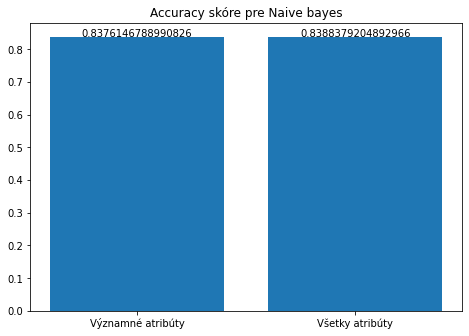

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Naive bayes")
datasety = ['Významné atribúty', 'Všetky atribúty']
plt.text(0, NB_skore[0], NB_skore[0], ha = 'center')
plt.text(1, NB_skore[1], NB_skore[1], ha = 'center')
ax.bar(datasety,NB_skore)
plt.show()

**Pri tomto type klasifikátora použitie viaccerých atribútov(okrem zvolených 4 významných atribútov vo fáze 2) pri predikovaní hodnoty cieľovej premennej indikátor takmer k zlepšeniu schopnsti predikovať hodnotu indikátora.**

#### 2. Logistická regresia

In [68]:
clf = LogisticRegression()

dosiahnutá úspešnosť pri použití len vybraných atribútov(trombocyty, etytr, hematokrit a leukocyty)

In [69]:
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [70]:
LR_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8541284403669724
precision skóre modelu: 0.8527473047284978
recall skóre modelu: 0.8541284403669724


In [71]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8911207486875143


dosiahnutá úspešnosť pri použití všetkých atribútov

In [72]:
model = clf.fit(x_train_all, y_train)
y_predicted = model.predict(x_test_all)

In [73]:
LR_skore.append(accuracy_score(y_test, y_predicted))

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8553516819571866
precision skóre modelu: 0.8539591221116785
recall skóre modelu: 0.8553516819571866


In [74]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.8918857142857143


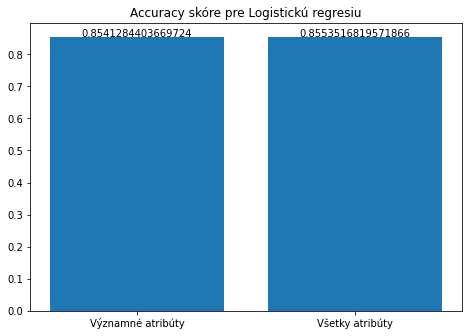

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Logistickú regresiu")
datasety = ['Významné atribúty', 'Všetky atribúty']
plt.text(0, LR_skore[0], LR_skore[0], ha = 'center')
plt.text(1, LR_skore[1], LR_skore[1], ha = 'center')
ax.bar(datasety,LR_skore)
plt.show()

**Pri tomto type klasifikátora použitie viaccerých atribútov(okrem zvolených 4 významných atribútov vo fáze 2) pri predikovaní hodnoty cieľovej premennej indikátor vedie len veľmi málo k zlepšeniu schopnsti predikovať hodnotu indikátora.**

#### 3. Random Forest

In [76]:
clf = RandomForestClassifier()

dosiahnutá úspešnosť pri použití len vybraných atribútov(trombocyty, etytr, hematokrit a leukocyty)

In [77]:
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [78]:
RF2_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9553516819571866
precision skóre modelu: 0.9553354591075103
recall skóre modelu: 0.9553516819571866


In [79]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9659832246039143


dosiahnutá úspešnosť pri použití všetkých atribútov

In [80]:
model = clf.fit(x_train_all, y_train)
y_predicted = model.predict(x_test_all)

In [81]:
RF2_skore.append(accuracy_score(y_test, y_predicted))

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9388379204892966
precision skóre modelu: 0.9388912954764782
recall skóre modelu: 0.9388379204892966


In [82]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9536822603056971


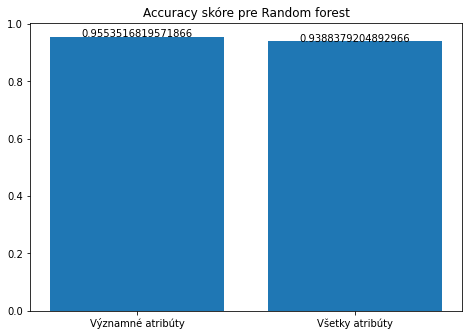

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Random forest")
datasety = ['Významné atribúty', 'Všetky atribúty']
plt.text(0, RF2_skore[0], RF2_skore[0], ha = 'center')
plt.text(1, RF2_skore[1], RF2_skore[1], ha = 'center')
ax.bar(datasety,RF2_skore)
plt.show()

**Pri tomto type klasifikátora použitie viaccerých atribútov(okrem zvolených 4 významných atribútov vo fáze 2)pri predikovaní hodnoty cieľovej premennej indikátor vedie k zhoršeniu zhoršeniu klasifikátora o takmer 2% v schopnosti určiť hodnotu predikovanej premennej.**

#### 4. Decision Tree

In [84]:
clf = tree.DecisionTreeClassifier(max_depth=25)

dosiahnutá úspešnosť pri použití len vybraných atribútov(trombocyty, etytr, hematokrit a leukocyty)

In [85]:
model = clf.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [86]:
DT2_skore = [accuracy_score(y_test, y_predicted)]

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.9174311926605505
precision skóre modelu: 0.917187092303794
recall skóre modelu: 0.9174311926605505


In [87]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9366791744840526


dosiahnutá úspešnosť pri použití všetkých atribútov

In [88]:
model = clf.fit(x_train_all, y_train)
y_predicted = model.predict(x_test_all)

In [89]:
DT2_skore.append(accuracy_score(y_test, y_predicted))

print("accuracy skóre modelu: {}".format(accuracy_score(y_test, y_predicted)))
print("precision skóre modelu: {}".format(precision_score(y_test, y_predicted, average='weighted')))
print("recall skóre modelu: {}".format(recall_score(y_test, y_predicted, average='weighted')))

accuracy skóre modelu: 0.8996941896024465
precision skóre modelu: 0.8993024326278094
recall skóre modelu: 0.8996941896024465


In [90]:
print("f1 skóre modelu: {}".format(f1_score(y_test, y_predicted)))

f1 skóre modelu: 0.9231850117096018


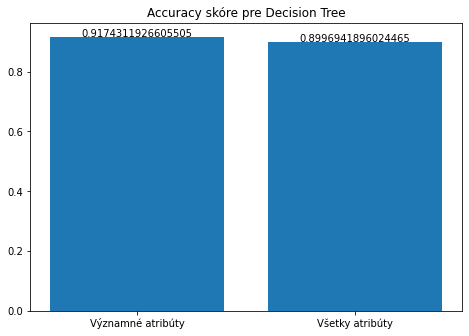

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy skóre pre Decision Tree")
datasety = ['Významné atribúty', 'Všetky atribúty']
plt.text(0, DT2_skore[0], DT2_skore[0], ha = 'center')
plt.text(1, DT2_skore[1], DT2_skore[1], ha = 'center')
ax.bar(datasety,DT2_skore)
plt.show()

**Pri tomto type klasifikátora použitie viaccerých atribútov(okrem zvolených 4 významných atribútov vo fáze 2)pri predikovaní hodnoty cieľovej premennej indikátor vedie k zhoršeniu zhoršeniu klasifikátora o takmer 1% v schopnosti určiť hodnotu predikovanej premennej.**


Keďže pre klasfikátory, ktoré dosahujú najväčšiu úspešnosť(RandomForest a DecisionTree) pri predikovaní hodnoty premennej indikátor viedlo redukovanie atribútov ktoré sú vstupom algoritmu pre strojové učenie k zvýšeniu jeho úspešnosti považujeme náš výber významných atribútov pre strojové učenie vo fáze predspracovania ako vhodný